In [1]:
from os import environ
GOOGLE_COLAB = True if "COLAB_GPU" in environ else False
if GOOGLE_COLAB:
    !pip install git+https://github.com/cweniger/swyft.git

In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [6]:
DEVICE = swyft.set_device(gpu=True)
MAX_EPOCHS = 10
EXPECTED_N = 4000

In [7]:
def simulator(z):
    return np.array([z[0],2*(z[1]-z[0])])

def noise(x, z = None, noise=0.01):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.55,0.45])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [8]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


In [10]:
intensity = None

for _ in range(2):
    if intensity is None:
        intensity = swyft.get_unit_intensity(expected_n=EXPECTED_N, dim=zdim)
    else:
        intensity = swyft.get_constrained_intensity(
            expected_n=EXPECTED_N,
            ratio_estimator=re,
            x0=x0,
            threshold=1e-4,
            #factor_mask=intensity.factor_mask,
        )
    cache.grow(intensity)
    cache.simulate(simulator)
    points = swyft.Points(cache, intensity, noise)
    re = swyft.RatioEstimator(points, device=DEVICE)
    re.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 1e-4])

No new simulator runs required.
No simulations required.
yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 18.960413217544556
Validation loss: 12.72647750377655
Validation loss: 13.04308706521988
Total epochs: 3
LR iteration 1
Validation loss: 10.94262245297432
Validation loss: 11.097629964351654
Total epochs: 2


Simulate:   5%|▌         | 190/3781 [00:00<00:01, 1899.75it/s]

Constrained posterior area: 0.050238167412494455
Adding 3781 new samples. Run simulator!


Simulate: 100%|██████████| 3781/3781 [00:02<00:00, 1873.88it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 55.932223320007324
Validation loss: 45.87442207336426
Validation loss: 39.580007553100586
Validation loss: 33.23530673980713
Validation loss: 30.678473472595215
Validation loss: 32.427026987075806
Total epochs: 6
LR iteration 1
Validation loss: 27.91451060771942
Validation loss: 29.226226091384888
Total epochs: 2


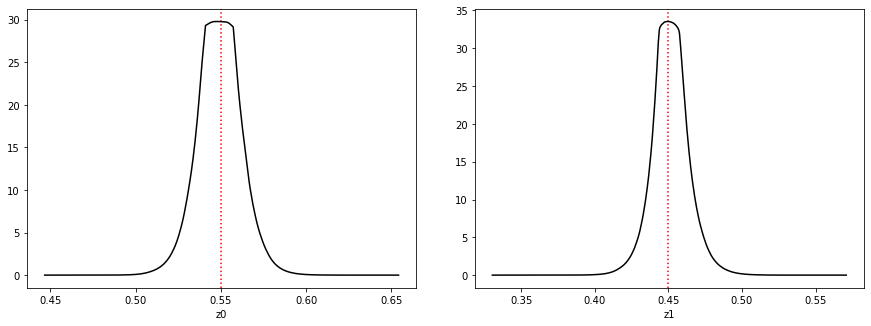

In [12]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys')

In [14]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 1e-4])

yshape (shape of features between head and legs): 2
Start training
LR iteration 0
Validation loss: 15.454382419586182
Validation loss: 4.293138541281223
Validation loss: 5.20032562315464
Total epochs: 3
LR iteration 1
Validation loss: 3.3068070635199547
Validation loss: 3.2652400135993958
Validation loss: 3.044019415974617
Validation loss: 3.2359282299876213
Total epochs: 4


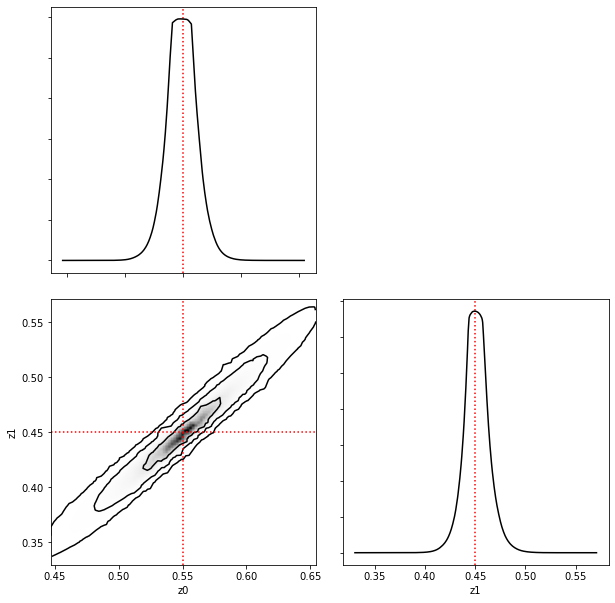

In [15]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10, max_n_points = 4000)